In [1]:
from google.colab import drive
drive.mount('/content/drive')
RESEARCH_WORK_PATH = "/content/drive/My Drive/Colab Notebooks/BachelorResearch/"

Mounted at /content/drive


In [2]:
import soundfile as sf
import librosa
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras 
import os
import cv2
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/BachelorResearch/models/efficient_net_v2_vanilla', compile=False)

In [3]:
def min_max(x, axis=None): # do min_max normalization ?->https://atmarkit.itmedia.co.jp/ait/articles/2110/07/news027.html
    min = 0
    max = 154.28702 
    # max = 137.74599
    x = np.abs(x)
    result = (x-min)/(max-min)
    return result

def quality_prediction(audio_path): # return prediction value
  data, sr = librosa.load(audio_path) 

  sum = np.zeros(4)
  for i in range(14):
    # Crop range
    start = i*2*sr
    stop  = (i*2 + 2)*sr

    # STFT
    n_fft=512
    hop_length=256
    stft = np.abs(librosa.stft(data[start:stop], n_fft=n_fft, hop_length=hop_length))


    # Normalization
    stft = min_max(stft)

    # Data Transform
    # input = np.expand_dims(stft, axis=0)
    # input = np.stack((input,)*3, axis=-1) # forced to make 3 channel img
    input = cv2.cvtColor(stft,cv2.COLOR_GRAY2RGB)
    input = np.expand_dims(input, axis=0)

    # np.set_printoptions(suppress=True)
    # print(input.shape)
    # print(type(input))
    # print(input[0,:,:,0])
    # print(input[0,:,:,1])
    # print(input[0,:,:,2])


    # Predict
    scores = model.predict(input)
    # print(scores)

    # Get sum
    sum = sum + scores

  return sum




def path_to_audiofiles(dir_folder):
    list_of_audio = []
    for file in os.listdir(dir_folder):
        if file.endswith(".wav"):
            directory = "%s%s" % (dir_folder, file)
            list_of_audio.append(directory)
    return list_of_audio

RESEARCH_WORK_PATH = "/content/drive/My Drive/Colab Notebooks/BachelorResearch/"
Q1 = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/renamed/Q1/"
Q2 = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/renamed/Q2/"
Q3 = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/renamed/Q3/"
Q4 = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/renamed/Q4/"

Q1_pred = [0,0,0,0]
sccs = 0
for i,audio in enumerate(path_to_audiofiles(Q1)):
  pred = np.argmax(quality_prediction(audio))
  Q1_pred[pred] = Q1_pred[pred]+1


In [4]:
Q2_pred = [0,0,0,0]
sccs = 0
for i,audio in enumerate(path_to_audiofiles(Q2)):
  pred = np.argmax(quality_prediction(audio))
  Q2_pred[pred] = Q2_pred[pred]+1

In [5]:
Q3_pred = [0,0,0,0]
sccs = 0
for i,audio in enumerate(path_to_audiofiles(Q3)):
  pred = np.argmax(quality_prediction(audio))
  Q3_pred[pred] = Q3_pred[pred]+1

In [6]:
Q4_pred = [0,0,0,0]
sccs = 0
for i,audio in enumerate(path_to_audiofiles(Q4)):
  pred = np.argmax(quality_prediction(audio))
  Q4_pred[pred] = Q4_pred[pred]+1

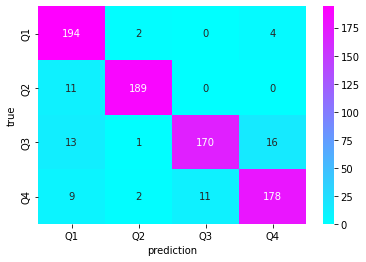

[[194, 2, 0, 4], [11, 189, 0, 0], [13, 1, 170, 16], [9, 2, 11, 178]]
[[97.   1.   0.   2. ]
 [ 5.5 94.5  0.   0. ]
 [ 6.5  0.5 85.   8. ]
 [ 4.5  1.   5.5 89. ]]


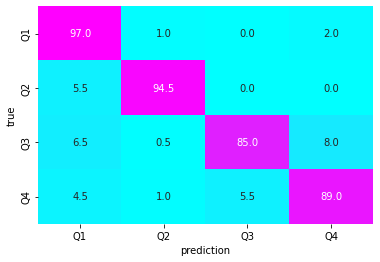

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

combined_arr = [Q1_pred, Q2_pred, Q3_pred, Q4_pred]
xl = ["Q1", "Q2", "Q3", "Q4"]
yl = xl


sns.heatmap(combined_arr, annot=True, fmt="d", xticklabels=xl, yticklabels=yl, cmap="cool")
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()
print(combined_arr)
print(np.array(combined_arr)/2)
sns.heatmap(np.array(combined_arr)/2, annot=True, fmt=".1f", xticklabels=xl, yticklabels=yl, cmap="cool", cbar=False)
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()

正規化が画像ごとのときのほうが、分類精度が良かった。

→画像ごとに正規化し、音量の平均値を別データとして与えたら、、良い精度が得られるのではないか。